In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import pickle as pkl
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [3]:
train_filepath = "train_workspace/"
animalList = ["Human","Pig","Chicken","Rat","Mouse","Dog"]
levelList = ["Strict","Relaxed","Intermediate"]
dataList = ["Ohnologs","No-Ohnologs","Paralogs"]
dataNameList = ["ohnologs","no-ohnologs","paralog"]
sb.set_style("darkgrid")

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [5]:
working_level = "Strict"

In [6]:
def get_df_dict(level):
    df_dict = {}    
    current_file_path = train_filepath + level + "/"
    for (dataName,data) in zip(dataNameList,dataList):                
        df_dict[data] = pd.read_pickle(current_file_path + dataName + "-complete2.pkl")        
    return df_dict

In [7]:
df_dict = get_df_dict(working_level)

In [10]:
df_dict["No-Ohnologs"]["Species"].unique()

array(['Human', 'Pig', 'Chicken', 'Rat', 'Mouse', 'Dog'], dtype=object)

In [862]:
df_dict["Paralogs"].isnull().values.any()

False

In [863]:
for dataName in dataList:
    df_dict[dataName].fillna(0,inplace=True)

In [864]:
print(df_dict["Ohnologs"].isnull().values.any())
print(df_dict["No-Ohnologs"].isnull().values.any())
print(df_dict["Paralogs"].isnull().values.any())

False
False
False


Text(0.5, 1.0, 'Ohnologs')

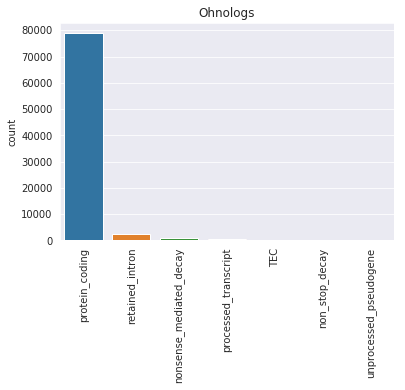

In [865]:
data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [866]:
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'Ohnologs')

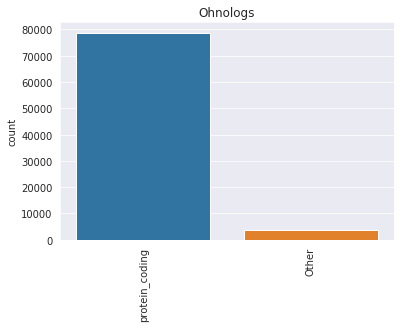

In [867]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [868]:
data = "No-Ohnologs"
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'No-Ohnologs')

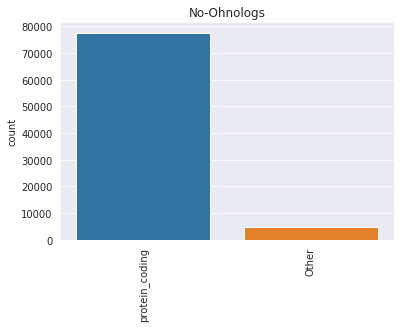

In [869]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [870]:
data = "Paralogs"
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'Paralogs')

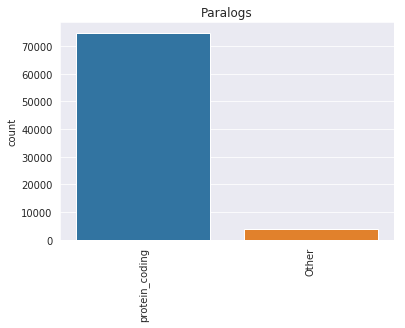

In [871]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)


Text(0.5, 1.0, 'Ohnologs')

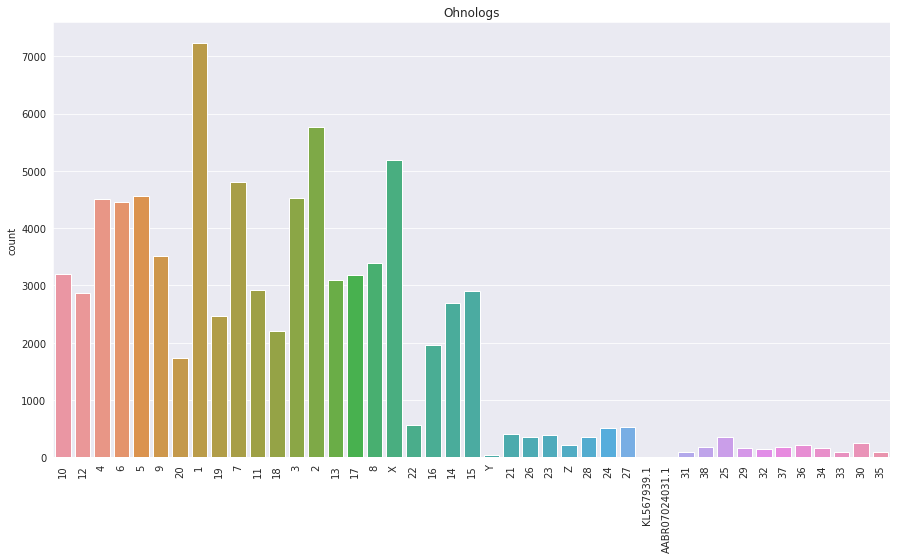

In [872]:
data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(15,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [873]:
ser.unique()
ser_filter = ser[ser != "KL567939.1"]
ser_filter = ser_filter[ser_filter != "AABR07024031.1"]

Text(0.5, 1.0, 'Ohnologs')

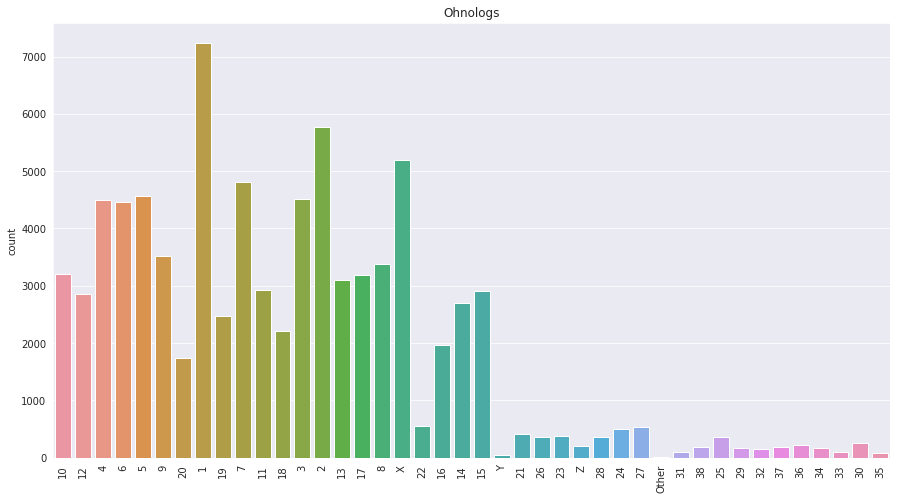

In [874]:
df_dict[data]["Sequence-1-Chromosome"].replace("KL567939.1","Other",inplace=True)
df_dict[data]["Sequence-2-Chromosome"].replace("KL567939.1","Other",inplace=True)

df_dict[data]["Sequence-1-Chromosome"].replace("AABR07024031.1","Other",inplace=True)
df_dict[data]["Sequence-2-Chromosome"].replace("AABR07024031.1","Other",inplace=True)

data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(15,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [875]:
data = "No-Ohnologs"

In [876]:
filter_ids_1 = ~df_dict[data]["Sequence-1-Chromosome"].isin(ser_filter.to_list())
filter_ids_2 = ~df_dict[data]["Sequence-2-Chromosome"].isin(ser_filter.to_list())

df_dict[data].loc[filter_ids_1,"Sequence-1-Chromosome"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Chromosome"] = "Other"

Text(0.5, 1.0, 'No-Ohnologs')

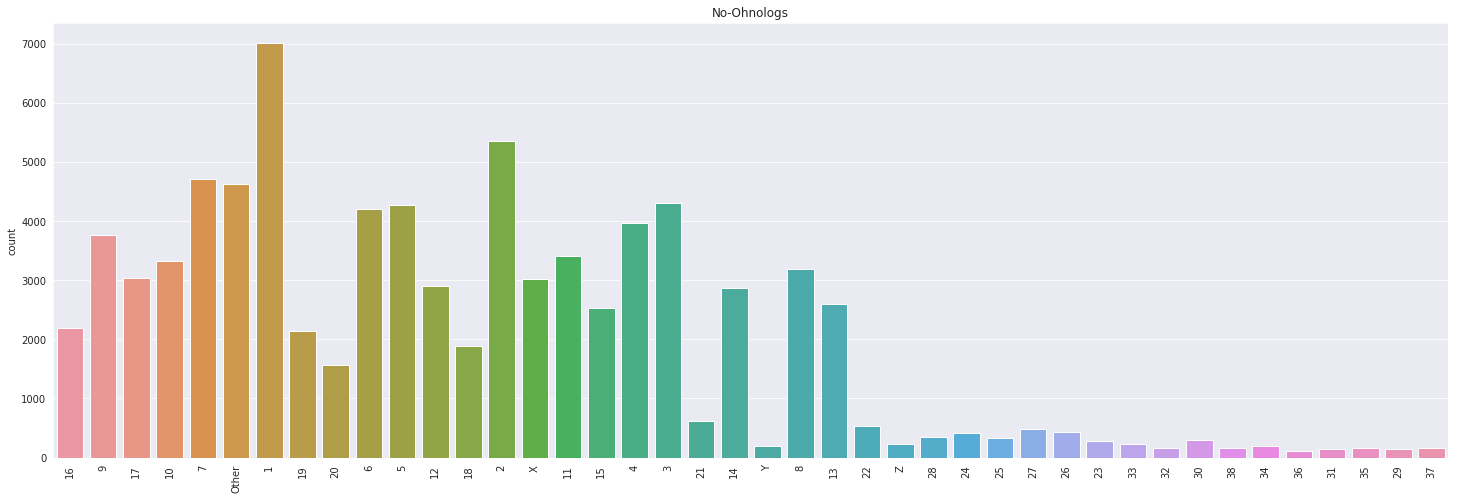

In [877]:
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(25,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [878]:
data = "Paralogs"

In [879]:
filter_ids_1 = ~df_dict[data]["Sequence-1-Chromosome"].isin(ser_filter.to_list())
filter_ids_2 = ~df_dict[data]["Sequence-2-Chromosome"].isin(ser_filter.to_list())

df_dict[data].loc[filter_ids_1,"Sequence-1-Chromosome"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Chromosome"] = "Other"

Text(0.5, 1.0, 'Paralogs')

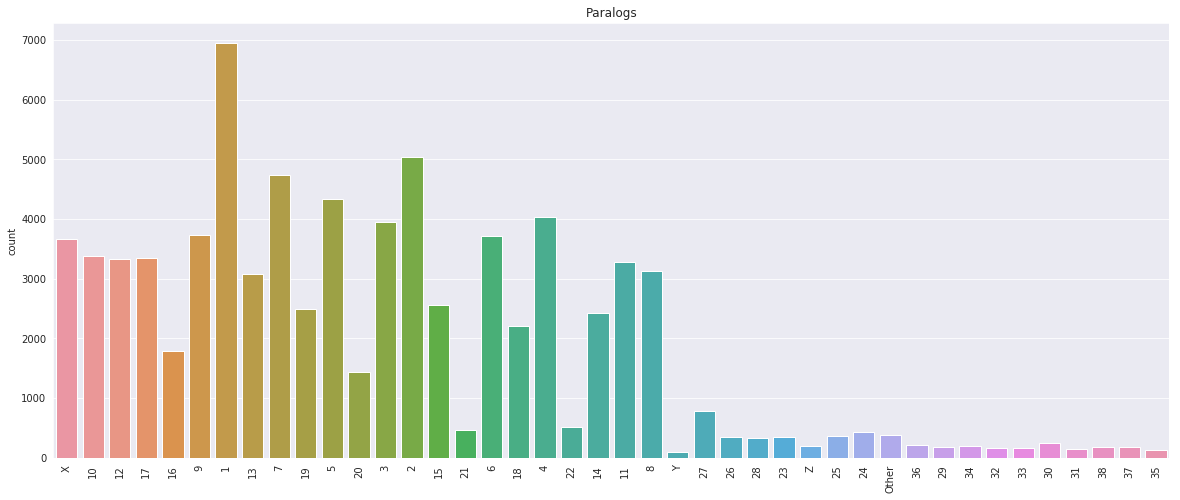

In [880]:
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(20,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [881]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Transcript-Biotype,Sequence-2-Transcript-Biotype,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,protein_coding,Other,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17
1,1,0.0,GAGCACATTGCACTTAATTGTTGCCACAGCCACAGATGTAAAGAGG...,0.363032,ENSG00000139329,3008,ENST00000266718,AGTACTAACATGGACTAATCTGTGGGAGCAGTTTATTCCAGTATCA...,0.344534,ENSG00000106819,2470,ENST00000375544,Human,4,7,protein_coding,protein_coding,12,9,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,98.708300,12.400000,0.000000,0.200000,1.744000,22.520000,98.708300,12.400000,0.000000,0.200000,1.744000,22.520000,10
2,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,protein_coding,protein_coding,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27
3,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,protein_coding,protein_coding,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8
4,1,0.0,ACCACAGAGGCGTCTGGCTAACTCATCTCCAGACCTAAGTTGGGAA...,0.572634,ENSG00000137216,3318,ENST00000259746,CAGTCTCCTGCCATGCAAAGAAGGCTCATAGAGTTGCTTTGGAAGT...,0.516923,ENSG00000196187,5407,ENST00000474478,Human,13,5,protein_coding,Other,6,1,0.000,0.0,0.0,0.0,0.000000e+00,0.0,86.0485,45.5,6.5,0.0,1.120000e-04,49.15,99.259222,11.833333,0.111111,0.000000,4.424444,22.344444,97.938150,15.200000,0.750000,0.000000,3.982011,25.025000,20


In [882]:
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)

In [883]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0
1,1,0.0,GAGCACATTGCACTTAATTGTTGCCACAGCCACAGATGTAAAGAGG...,0.363032,ENSG00000139329,3008,ENST00000266718,AGTACTAACATGGACTAATCTGTGGGAGCAGTTTATTCCAGTATCA...,0.344534,ENSG00000106819,2470,ENST00000375544,Human,4,7,12,9,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,98.708300,12.400000,0.000000,0.200000,1.744000,22.520000,98.708300,12.400000,0.000000,0.200000,1.744000,22.520000,10,1,1
2,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1
3,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1
4,1,0.0,ACCACAGAGGCGTCTGGCTAACTCATCTCCAGACCTAAGTTGGGAA...,0.572634,ENSG00000137216,3318,ENST00000259746,CAGTCTCCTGCCATGCAAAGAAGGCTCATAGAGTTGCTTTGGAAGT...,0.516923,ENSG00000196187,5407,ENST00000474478,Human,13,5,6,1,0.000,0.0,0.0,0.0,0.000000e+00,0.0,86.0485,45.5,6.5,0.0,1.120000e-04,49.15,99.259222,11.833333,0.111111,0.000000,4.424444,22.344444,97.938150,15.200000,0.750000,0.000000,3.982011,25.025000,20,1,0


In [11]:
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Specie'],columns=['Species'], drop_first=False)

In [12]:
pd.set_option("display.max_columns", None)
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Transcript-Biotype,Sequence-2-Transcript-Biotype,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Specie_Chicken,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,3,5,protein_coding,retained_intron,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,0,0,1,0,0,0
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,10,4,protein_coding,protein_coding,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,0,0,1,0,0,0
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,3,5,protein_coding,protein_coding,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,0,0,1,0,0,0
3,1,0.0,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,0.684226,ENSG00000130758,3436,ENST00000253055,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,0.591079,ENSG00000173327,5605,ENST00000527304,7,1,protein_coding,retained_intron,19,11,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,0,0,1,0,0,0
4,1,0.0,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,0.402629,ENSG00000166562,2054,ENST00000509791,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,0.493657,ENSG00000140612,3626,ENST00000558924,7,1,protein_coding,retained_intron,18,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,0,0,1,0,0,0


In [886]:
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Specie'],columns=['Species'], drop_first=True)

df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)
df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Specie'],columns=['Species'], drop_first=True)

In [887]:
def get_embeddings(kmer,kind):    
    df_emb = {}
    if(kind != ""):
        kind = "_" + kind   
    for data in dataList:
        df_emb[data] = []
        df_emb[data].append(pd.read_pickle(train_filepath + working_level + "/embeddings_dna2vec/" + str(kmer) + "kmer/" + data.lower() + "1-vec-"+ str(kmer) + "kmer" + kind + ".pkl"))
        df_emb[data].append(pd.read_pickle(train_filepath + working_level + "/embeddings_dna2vec/" + str(kmer) + "kmer/" + data.lower() + "2-vec-"+ str(kmer) + "kmer" + kind + ".pkl"))
    return df_emb
    
kmer_chosen = 8
type_chosen = "cdna2"
df_emb_dict = get_embeddings(kmer_chosen,type_chosen)
df_emb_dict["Ohnologs"][0].head()

,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199
0,6.975642,18.589622,-21.670636,11.890779,38.243541,-54.679520,-37.047566,19.991252,44.667695,11.553669,29.118073,77.377525,-88.237219,14.783385,-39.938764,46.524221,62.855141,64.553614,8.204893,37.842395,-56.848221,85.843847,29.069223,-5.420136,6.054648,-107.101758,15.848590,49.237878,45.012758,-7.750203,38.586400,-30.979360,21.878617,21.240806,-22.718060,-27.596384,29.653486,-54.553564,-69.658407,-34.275823,-5.844475,22.950770,-9.052415,46.444535,-33.532534,70.768800,-36.793063,8.644557,37.299181,-17.500525,-2.114745,-57.934428,-1.602280,75.930107,34.869345,58.287892,-51.028122,11.523071,60.408259,111.219986,22.580079,-20.022609,-31.540751,-17.700480,-37.957464,34.764259,-54.354565,-2.152202,45.521411,2.777289,-62.307476,43.816346,17.465304,-9.181642,-2.075572,29.957706,-33.302144,-12.817795,44.972327,-78.387253,6.653853,18.059982,-35.480775,21.754262,21.949479,-2.956859,27.886917,65.647509,-38.149836,-88.113976,9.341077,107.205518,-41.313528,-20.041395,3.637235,2.510761,-25.654502,-15.304283,-76.228578,-4.181950,0.496619,-10.730569,12.441390,-34.310441,13.357813,-58.249008,41.053600,22.554

In [888]:
def get_cosine_similarity(dataName,emb_type,kmer):    
    return pd.read_pickle(train_filepath + working_level + "/cosine_similarity/" + dataName + "-" + emb_type + "-" + str(kmer) + ".pkl")   
        

In [889]:
type_chosen_cosine = type_chosen
if(type_chosen == ""):
    type_chosen_cosine = "normal"
for dataName in dataList:    
    df_dict[dataName] = pd.concat([df_dict[dataName].reset_index(drop=True),get_cosine_similarity(dataName,type_chosen_cosine,kmer_chosen).reset_index(drop=True)],axis=1,sort=False)    

In [890]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Cosine_Similarity
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,0,1,0,0,0,0.981684
1,1,0.0,GAGCACATTGCACTTAATTGTTGCCACAGCCACAGATGTAAAGAGG...,0.363032,ENSG00000139329,3008,ENST00000266718,AGTACTAACATGGACTAATCTGTGGGAGCAGTTTATTCCAGTATCA...,0.344534,ENSG00000106819,2470,ENST00000375544,4,7,12,9,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,98.708300,12.400000,0.000000,0.200000,1.744000,22.520000,98.708300,12.400000,0.000000,0.200000,1.744000,22.520000,10,1,1,0,1,0,0,0,0.985923
2,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,0,1,0,0,0,0.992172
3,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,0,1,0,0,0,0.987324
4,1,0.0,ACCACAGAGGCGTCTGGCTAACTCATCTCCAGACCTAAGTTGGGAA...,0.572634,ENSG00000137216,3318,ENST00000259746,CAGTCTCCTGCCATGCAAAGAAGGCTCATAGAGTTGCTTTGGAAGT...,0.516923,ENSG00000196187,5407,ENST00000474478,13,5,6,1,0.000,0.0,0.0,0.0,0.000000e+00,0.0,86.0485,45.5,6.5,0.0,1.120000e-04,49.15,99.259222,11.833333,0.111111,0.000000,4.424444,22.344444,97.938150,15.200000,0.750000,0.000000,3.982011,25.025000,20,1,0,0,1,0,0,0,0.962172


## Start Designing

In [891]:
blast_columns = ["Percent Identical Matches","Aligment Length","Nr Mismatch","Nr Gap Open","Evalue","Bit Score"]

e_values_columns = ["Evalue_Total","Evalue_High","Evalue_Medium","Evalue_Low"]

blast_types = ["High","Medium","Low","Total"]
blast_col_Total = [i + "_Total" for i in blast_columns] 
blast_col_High = [i + "_High" for i in blast_columns]
blast_col_Medium = [i + "_Medium" for i in blast_columns]
blast_col_Low = [i + "_Low" for i in blast_columns]

blast_cols_levels = blast_col_High + blast_col_Medium + blast_col_Low
total_columns = (blast_col_High + blast_col_Medium + blast_col_Low + blast_col_Total + ["Nr Hits"])

non_training_meta_features = ["Sequence-1","Sequence-2","Sequence-1 Id","Sequence-1-Transcript Id","Sequence-2 Id","Sequence-2-Transcript Id","Sequence-1-Transcript-Version","Sequence-2-Transcript-Version"]

sequence_1_metadata = ["Sequence-1 GC","Sequence-1 Length","Sequence-1-Chromosome","Seq-1-Biotype_protein_coding"]
sequence_2_metadata = ["Sequence-2 GC","Sequence-2 Length","Sequence-2-Chromosome","Seq-2-Biotype_protein_coding"]

sequence_1_metadata_diferential = ["Sequence-1 GC","Sequence-1 Length"]
sequence_2_metadata_diferential = ["Sequence-2 GC","Sequence-2 Length"]

sequence_1_metadata_categorical = ["Sequence-1-Chromosome","Seq-1-Biotype_protein_coding"]
sequence_2_metadata_categorical = ["Sequence-2-Chromosome","Seq-2-Biotype_protein_coding"]

species_metadata = ["Specie_Chicken","Specie_Dog","Specie_Human","Specie_Mouse","Specie_Pig","Specie_Rat"]

emb_size = 100
if(type_chosen == "cdna2"):
    emb_size = 200
embedding_1_cols = ["Embedding1_" + str(i) for i in range(0,emb_size)]
embedding_2_cols = ["Embedding2_" + str(i) for i in range(0,emb_size)]

In [892]:
## Ver los efectos de no normalizar las longitudes o tambien de como hacer el encoding de los Chromosomas
dataset_ohnologs = df_dict["Ohnologs"].drop(non_training_meta_features,axis=1)
dataset_ohnologs = dataset_ohnologs.drop(["Is_Paralog"],axis=1)

cols = dataset_ohnologs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_ohnologs = dataset_ohnologs[cols]

dataset_ohnologs = pd.concat([dataset_ohnologs[species_metadata],dataset_ohnologs.drop(dataset_ohnologs[species_metadata],axis=1)],axis=1, sort=False)
dataset_ohnologs.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Cosine_Similarity
0,0,1,0,0,0,1,0.429090,3307,10,73.058,0.469856,5706,5,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,0.981684
1,0,1,0,0,0,1,0.363032,3008,12,0.000,0.344534,2470,9,0.0,0.0,0.0,0.000000e+00,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,98.708300,12.400000,0.000000,0.200000,1.744000,22.520000,98.708300,12.400000,0.000000,0.200000,1.744000,22.520000,10,1,1,0.985923
2,0,1,0,0,0,1,0.441268,5772,4,78.307,0.450953,4934,X,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,0.992172
3,0,1,0,0,0,1,0.357972,11973,4,77.410,0.402006,2393,5,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,0.987324
4,0,1,0,0,0,1,0.572634,3318,6,0.000,0.516923,5407,1,0.0,0.0,0.0,0.000000e+00,0.0,86.0485,45.5,6.5,0.0,1.120000e-04,49.15,99.259222,11.833333,0.111111,0.000000,4.424444,22.344444,97.938150,15.200000,0.750000,0.000000,3.982011,25.025000,20,1,0,0.962172


In [893]:
dataset_ohnologs.reset_index(inplace=True, drop=True)
dataset_ohnologs = pd.concat([dataset_ohnologs.drop(sequence_2_metadata,axis=1),df_emb_dict["Ohnologs"][0],dataset_ohnologs[sequence_2_metadata],df_emb_dict["Ohnologs"][1]],axis=1, sort=False)
dataset_ohnologs.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,E

In [894]:
## Realizar lo mismo con los No Ohnologs
dataset_no_ohnologs = df_dict["No-Ohnologs"].drop(non_training_meta_features,axis=1)
dataset_no_ohnologs = dataset_no_ohnologs.drop(["Is_Paralog"],axis=1)

cols = dataset_no_ohnologs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_no_ohnologs = dataset_no_ohnologs[cols]

dataset_no_ohnologs = pd.concat([dataset_no_ohnologs[species_metadata],dataset_no_ohnologs.drop(dataset_no_ohnologs[species_metadata],axis=1)],axis=1, sort=False)
dataset_no_ohnologs.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Cosine_Similarity
0,0,1,0,0,0,0,0.551571,2482,16,0.0,0.504950,3535,Other,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,97.519975,13.025000,0.250000,0.175000,6.441900,22.520000,97.519975,13.025000,0.250000,0.175000,6.441900,22.520000,40.0,1,1,0.944261
1,0,1,0,0,0,0,0.483723,3717,9,0.0,0.370931,4885,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,100.000000,11.750000,0.000000,0.000000,1.940000,22.800000,100.000000,11.750000,0.000000,0.000000,1.940000,22.800000,4.0,1,1,0.814499
2,0,1,0,0,0,0,0.497962,3189,17,0.0,0.666667,1023,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,96.875000,14.000000,0.250000,0.250000,2.377500,23.750000,96.875000,14.000000,0.250000,0.250000,2.377500,23.750000,4.0,1,1,0.959995
3,0,1,0,0,0,0,0.610323,3100,17,0.0,0.453086,4359,22,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,96.325222,15.444444,0.777778,0.000000,4.684444,25.344444,96.325222,15.444444,0.777778,0.000000,4.684444,25.344444,9.0,1,1,0.966646
4,0,1,0,0,0,0,0.415766,5924,10,0.0,0.453086,4050,4,0.0,0.0,0.0,0.0,0.0,78.262176,134.823529,29.294118,4.137255,0.00021,57.405882,95.875148,14.851852,0.814815,0.185185,5.218926,22.511111,84.358974,93.294872,19.435897,2.769231,1.806689,45.326923,78.0,1,1,0.969475


In [895]:
dataset_no_ohnologs.reset_index(inplace=True, drop=True)

dataset_no_ohnologs = pd.concat([dataset_no_ohnologs.drop(sequence_2_metadata,axis=1),df_emb_dict["No-Ohnologs"][0],dataset_no_ohnologs[sequence_2_metadata],df_emb_dict["No-Ohnologs"][1]],axis=1, sort=False)
dataset_no_ohnologs.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,E

In [896]:
print(len(dataset_ohnologs))
print(len(dataset_no_ohnologs))
dataset_complete = dataset_ohnologs.append(dataset_no_ohnologs)
print(len(dataset_complete))
dataset_complete.head()

41265
41265
82530


,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,E

In [897]:
dataset_complete= dataset_complete.astype({"Is_Ohnolog": int,"Sequence-1 Length" : int, "Sequence-2 Length": int})

In [898]:
## Worth to keep order in chromosomes?
#le = preprocessing.LabelEncoder()
#le.fit(dataset_complete["Sequence-1-Chromosome"].values)
#list(le.classes_)
#le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#le_name_mapping

In [899]:
dataset_complete["Sequence-1-Chromosome"].unique()

array(['10', '12', '4', '6', '5', '9', '20', '1', '19', '7', '11', '18',
       '3', '2', '13', '17', '8', 'X', '22', '16', '14', '15', 'Y', '21',
       '26', '23', 'Z', '28', '24', '27', 'Other', '31', '38', '25', '29',
       '32', '37', '36', '34', '33', '30', '35'], dtype=object)

In [900]:
seq1 = list(dataset_complete["Sequence-1-Chromosome"].unique())
seq2 = list(dataset_complete["Sequence-2-Chromosome"].unique())
chrm_values = list(set((seq1 + seq2)))
cleaned = [ int(x) for x in chrm_values if x.isdigit() ]
current_max = max(cleaned)
current_max

38

In [901]:
chromosome_dict = {}

for i in range(1,current_max+1):
    chromosome_dict[str(i)] = str(i)

chromosome_dict["X"] = str(current_max + 1)
chromosome_dict["Y"] = str(current_max + 2)
chromosome_dict["Z"] = str(current_max + 3)
chromosome_dict["Other"] = str(current_max + 4)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "X", 'Sequence-1-Chromosome'] = str(current_max + 1)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "X", 'Sequence-2-Chromosome'] = str(current_max + 1)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Y", 'Sequence-1-Chromosome'] = str(current_max + 2)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Y", 'Sequence-2-Chromosome'] = str(current_max + 2)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Z", 'Sequence-1-Chromosome'] = str(current_max + 3)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Z", 'Sequence-2-Chromosome'] = str(current_max + 3)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Other", 'Sequence-1-Chromosome'] = str(current_max + 4)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Other", 'Sequence-2-Chromosome'] = str(current_max + 4)

dataset_complete.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,E

In [902]:
dataset_complete = dataset_complete.astype({"Sequence-1-Chromosome": int,"Sequence-2-Chromosome" : int})

In [903]:
dataset_complete_no_scaling = dataset_complete.copy()
dataset_complete.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,E

In [904]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete["Sequence-1 Length"].values.reshape(-1,1))
dataset_complete["Sequence-1 Length"] = x_scaled

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [905]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete["Sequence-2 Length"].values.reshape(-1,1))
dataset_complete["Sequence-2 Length"] = x_scaled

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [906]:
for column in total_columns:
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(dataset_complete[column].values.reshape(-1,1))
    dataset_complete[column] = x_scaled

In [907]:
dataset_complete.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,E

## Dataset Complete End

In [908]:
dataset_complete.to_pickle(train_filepath + working_level + "/datasets/dataset_complete-" + str(kmer_chosen) + "-" + type_chosen_cosine + ".pkl")

## Diferential

In [909]:
df_complete_diferential = dataset_complete[["Specie_Dog","Specie_Human","Specie_Mouse","Specie_Pig","Specie_Rat"] + embedding_1_cols + embedding_2_cols + ["Is_Ohnolog"] + ["Cosine_Similarity"] + total_columns].copy()
df_complete_diferential["GC_Diff"] = dataset_complete["Sequence-1 GC"] -  dataset_complete["Sequence-2 GC"]
df_complete_diferential["Length_Diff"] = dataset_complete["Sequence-1 Length"] -  dataset_complete["Sequence-2 Length"]
df_complete_diferential.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2

In [910]:
df_complete_diferential["Same_Chromosome"] = (dataset_complete["Sequence-1-Chromosome"] == dataset_complete["Sequence-2-Chromosome"]).astype(int)
df_complete_diferential["Same_Biotype"] = (dataset_complete["Seq-1-Biotype_protein_coding"] == dataset_complete["Seq-2-Biotype_protein_coding"]).astype(int)
df_complete_diferential.head()    

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2

In [911]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df_complete_diferential["Length_Diff"].values.reshape(-1,1))
df_complete_diferential["Length_Diff"] = x_scaled
df_complete_diferential.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding1_100,Embedding1_101,Embedding1_102,Embedding1_103,Embedding1_104,Embedding1_105,Embedding1_106,Embedding1_107,Embedding1_108,Embedding1_109,Embedding1_110,Embedding1_111,Embedding1_112,Embedding1_113,Embedding1_114,Embedding1_115,Embedding1_116,Embedding1_117,Embedding1_118,Embedding1_119,Embedding1_120,Embedding1_121,Embedding1_122,Embedding1_123,Embedding1_124,Embedding1_125,Embedding1_126,Embedding1_127,Embedding1_128,Embedding1_129,Embedding1_130,Embedding1_131,Embedding1_132,Embedding1_133,Embedding1_134,Embedding1_135,Embedding1_136,Embedding1_137,Embedding1_138,Embedding1_139,Embedding1_140,Embedding1_141,Embedding1_142,Embedding1_143,Embedding1_144,Embedding1_145,Embedding1_146,Embedding1_147,Embedding1_148,Embedding1_149,Embedding1_150,Embedding1_151,Embedding1_152,Embedding1_153,Embedding1_154,Embedding1_155,Embedding1_156,Embedding1_157,Embedding1_158,Embedding1_159,Embedding1_160,Embedding1_161,Embedding1_162,Embedding1_163,Embedding1_164,Embedding1_165,Embedding1_166,Embedding1_167,Embedding1_168,Embedding1_169,Embedding1_170,Embedding1_171,Embedding1_172,Embedding1_173,Embedding1_174,Embedding1_175,Embedding1_176,Embedding1_177,Embedding1_178,Embedding1_179,Embedding1_180,Embedding1_181,Embedding1_182,Embedding1_183,Embedding1_184,Embedding1_185,Embedding1_186,Embedding1_187,Embedding1_188,Embedding1_189,Embedding1_190,Embedding1_191,Embedding1_192,Embedding1_193,Embedding1_194,Embedding1_195,Embedding1_196,Embedding1_197,Embedding1_198,Embedding1_199,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2

## Diferential Complete End

In [912]:
df_complete_diferential.to_pickle(train_filepath + working_level + "/datasets/dataset_diferential-" + str(kmer_chosen) + "-" + type_chosen_cosine + ".pkl")